<a href="https://colab.research.google.com/github/musfiquerprottoy/BRACU-CSE330/blob/main/LAB%2006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions: Make a copy of this notebook and rename into the format `ID.ipynb` (example: `12345678.ipynb`). Read all the comments and write appropriate code near any place that says `# YOUR CODE HERE`. When the daily evaluation tasks are revealed, add their solutions at the end of this notebook.

---
# Part 1: Root Finding Using Bisection Method
---

### Root Finding:
Let $f(x)$ be a function of $x$. if for some $x=\alpha, f(x) = f(\alpha) = 0$, we say $\alpha$ is a root of the function $f$.

Let,
$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + 0.5x + 2\tag{6.1}$$

The graph of $f(x)$ looks like the following. Roots are the points where the graph intersects with the $X$-axis.

[-2.220276 -1.618034 -0.654992 0.618034 1.375268]


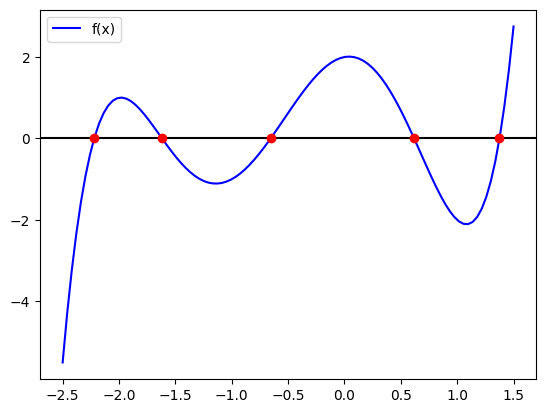

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
np.set_printoptions(precision=9, formatter={'all': lambda x: f'{x:f}'})

f = Polynomial([2.0, 0.5, -6.0, -2.0, 2.5, 1.0])
print(f.roots())

x = np.linspace(-2.5, 1.5, 100)
y = f(x)
plt.axhline(y=0, color='k')
plt.plot(x, y, 'b', label='f(x)')
plt.plot(f.roots(), [0.0]*5, 'ro')
plt.legend()

### Bisection

One way to find out roots is to use the bisection method. The strategy is that, if $\alpha$ is a root between and interval $[a, b]$ then graph will cross the $X$-axis at $\alpha$. So, $sign( f(\alpha-h) ) = - sign( f(\alpha+h) )$, for small value of $h$.

So, we can work our way up towards the root by taking average of $a$ and $b$, as long as the signs are different.

we will start with $a_0$ and $b_0$, such that, $f(a_0) f(b_0) < 0$.
Then we iterate as this,
\begin{align}
m_k &= \frac{a_k + b_k}{2} \\
\text{if, } f(a_k) f(m_k) < 0, \text{ then, } a_{k+1} &= a_k \text{ and, } b_{k+1} = m_k \\
\text{else, } a_{k+1} &= m_k \text{ and, } b_{k+1} = b_k \\
 \text{and, in both cases, } m_{k+1} &= \frac{a_{k+1} + b_{k+1}}{2}
\end{align}

We keep iterating until we find the root with sufficient precision. One way to do it is to keep iterating until the following condition is met,
$$
\frac{|a_k - b_k|}{2} \leq \epsilon \\  
$$
Where, $\epsilon$ is a positive constant very close to zero. If we use $\epsilon = 10^{-6}$ then we can ensure that $m_k$ is within $10^{-6}$ distance away from the root.

## Task 1 - 2 Marks
Complete the code below to iterate and solve for a root of the following function, between the interval, $[1, 1.5]$:
\begin{aligned}
    f(x) = 2 + 0.5x - 6x^2 - 2x^3 + 2.5x^4 + x^5.
\end{aligned}

In [ ]:
# The polynomial and the range is defined for you
f = Polynomial([2.0, 0.5, -6.0, -2.0, 2.5, 1.0])
a = 1.0
b = 1.5
m = (a + b) / 2
e = 1e-6

# Populate the following lists in each iteration
# Make sure that all three lists contain the equal number of elements at the end
# and that the last item of list_m is the root
list_a = [a]
list_b = [b]
list_m = [m]

# YOUR CODE HERE
while (b - a) / 2 > e:
  if f(a) * f(m) < 0:
    b = m
  else:
    a = m
  m = (a + b) / 2
  list_a.append(a)
  list_b.append(b)
  list_m.append(m)

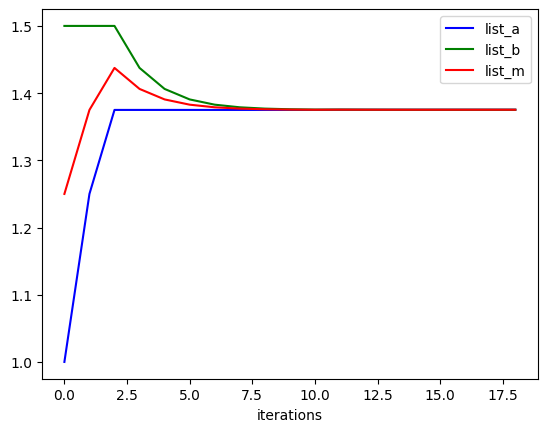

In [ ]:
root = list_m[-1]
assert abs(root - 1.375268) < 1e-6
xs = np.arange(0, len(list_m))
plt.plot(xs, list_a, 'b', label='list_a')
plt.plot(xs, list_b, 'g', label='list_b')
plt.plot(xs, list_m, 'r', label='list_m')
plt.xlabel('iterations')
plt.legend()

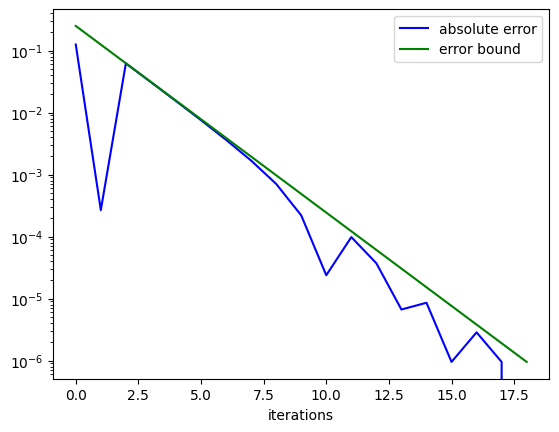

In [ ]:
assert abs(root - 1.375268) < 1e-6
xs = np.arange(0, len(list_m))
error_m = np.abs(np.array(list_m) - root)
bound_e = np.abs(np.array(list_a) - np.array(list_b)) / 2
plt.plot(xs, error_m, 'b', label='absolute error')
plt.plot(xs, bound_e, 'g', label='error bound')
plt.xlabel('iterations')
plt.yscale('log')
plt.legend()

# Part 2: Fixed Point Iteration
---

### Fixed point:
A number $\xi$ is called a **fixed point** to function $g(x)$ if $g(\xi) = \xi$. Using fixed points are a nice strategy to find roots of an equation. In this method if we are trying to find a root of $f(x) = 0$, we try to write the function in the form, $x = g(x)$. That is,
$$
f(x) = g(x) - x = 0
$$

So, if $\xi$ is a fixed point of $g(x)$ it would also be a root of $f(x)=0$, because,
$$
f(\xi) = \xi - g(\xi) = \xi - \xi = 0
$$

We can find a suitable $g(x)$ in any number of ways. Not all of them would converge, whereas, Some would converge very fast. For example, consider $Eq. 6.1$.

\begin{align}
&         &    f(x) &=x^5 + 2.5x^4 - 2x^3 - 6x^2 + 0.5x + 2 \\
&\implies &g(x) - x &=x^5 + 2.5x^4 - 2x^3 - 6x^2 + 0.5x + 2 \\
&\implies &    g(x) &=x^5 + 2.5x^4 - 2x^3 - 6x^2 + 1.5x + 2 \tag{6.2}\\
\end{align}

again,
$$
f(x) = x^5 + 2.5x^4 - 2x^3 - 6x^2 + 0.5x + 2 = 0\\
$$

\begin{align}
&\implies &6x^2 &= x^5 + 2.5x^4 - 2x^3 + 0.5x + 2 \\
&\implies &x^2  &= \frac{1}{6}(x^5 + 2.5x^4 - 2x^3 + 0.5x + 2) \\
&\implies &x    &= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 - 2x^3 + 0.5x + 2)} \\
&\implies &g(x) &= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 - 2x^3 + 0.5x + 2)} \tag{6.3}\\
\end{align}

Similarly,
$$
f(x) = x^5 + 2.5x^4 - 2x^3 - 6x^2 + 0.5x + 2 = 0\\
$$

\begin{align}
&\implies &2.5x^4 &= -x^5 + 2x^3 + 6x^2 - 0.5x - 2 \\
&\implies &x^4    &= \frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - 0.5x - 2) \\
&\implies &x      &= \sqrt[4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - 0.5x - 2)} \\
&\implies &g(x)   &= \sqrt[4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - 0.5x - 2)} \tag{6.4}\\
\end{align}

## Task 2 - 2 Marks
For this example we will use a couple of $g(x)$ functions to find out which ones converge.

In [ ]:
f = Polynomial([2.0, 0.5, -6.0, -2.0, 2.5, 1.0])

g1 = Polynomial([2.0, 1.5, -6.0, -2.0, 2.5, 1.0])

def g2(x):
    p = Polynomial([2.0, 0.5, 0.0, -2.0, 2.5, 1.0])
    # Add a check to avoid taking the square root of a negative number
    return np.sqrt(p(x)/6)


def g3(x):
    p = Polynomial([-2.0, -0.5, 6.0, 2.0, 0.0, -1.0])
    return np.power(p(x)/2.5, 1.0/4.0)

a1 = 0.8
a2 = 0.8
a3 = 0.8


# Populate the following lists in each iteration
# Make sure that all three lists contain the equal number of elements at the end
# and that upon convergence that the last items of all three lists are the roots
g1_a = [a1]
g2_a = [a2]
g3_a = [a3]

# YOUR CODE HERE
for i in range(21):
  p = g1(a1)
  g1_a.append(p)
  a1 = p
  q = g2(a2)
  g2_a.append(q)
  a2 = q
  r = g3(a3)
  g3_a.append(r)
  a3 = r

/tmp/ipython-input-975274231.py:13: RuntimeWarning: invalid value encountered in power
  return np.power(p(x)/2.5, 1.0/4.0)


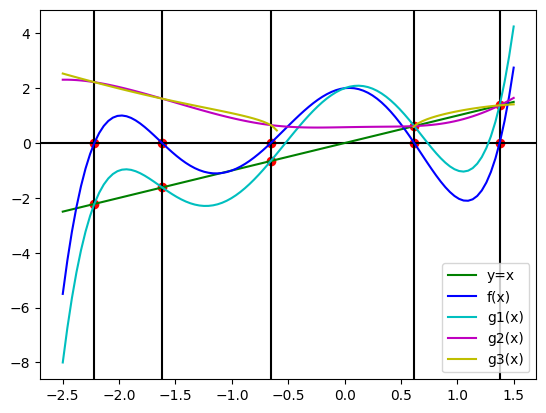

In [ ]:
root = np.array([g1_a[-1], g2_a[-1], g3_a[-1]])
np.testing.assert_array_almost_equal(root, [np.nan, 0.618034, 1.375268])
plt.plot(f.roots(), f.roots(), 'ro')
plt.plot(f.roots(), [0.0]*5, 'ro')
plt.axhline(y=0, color='k')
for y in f.roots():
    plt.axvline(x=y, color='k')

xs = np.linspace(-2.5, 1.5, 100)
plt.plot(xs, xs, label='y=x', color = 'g')
plt.plot(xs, f(xs), label='f(x)', color='b')
plt.plot(xs, g1(xs), label='g1(x)', color='c')
plt.plot(xs, g2(xs), label='g2(x)', color ='m')
plt.plot(xs, g3(xs), label='g3(x)', color = 'y' )
plt.legend()

# Daily Evaluation - 4 Marks

In [ ]:
Let, f(x) = (x - 22)(x - 100) + tanh(x).
f(x) = 0 has a root between [0, 99]. Also, f(0) > 0, f(99) < 0.

First, find and print any one root in the mentioned interval using the bisection method. Ensure absolute error less than 10-6.

Then, find and print the other root using the fixed point iteration method starting from any point x > 101. Ensure absolute error less than 10-6.

Next, plot f (a curve) in a range containing both roots (use at least 1000 evenly spaced samples).

Also, plot the roots (two points) in the same image. Make sure that the two points are distinguishable from the curve.



In [ ]:
# The polynomial and the range is defined for you

f = Polynomial([2200, -122, 1, 1])
a = 1.0
b = 1.5
m = (a + b) / 2
e = 1e-6

# Populate the following lists in each iteration
# Make sure that all three lists contain the equal number of elements at the end
# and that the last item of list_m is the root
list_a = [a]
list_b = [b]
list_m = [m]

# YOUR CODE HERE
while (b - a) / 2 > e:
  if f(a) * f(m) < 0:
    b = m
  else:
    a = m
  m = (a + b) / 2
  list_a.append(a)
  list_b.append(b)
  list_m.append(m)

In [ ]:
f = Polynomial([-22, -100, 1])

g1 =Polynomial([1, -100, -22])

def g2(x):
    p = Polynomial([2.0, 0.5, 0.0, -2.0, 2.5, 1.0])
    # Add a check to avoid taking the square root of a negative number
    return np.sqrt(p(x)/6)


def g3(x):
    p = Polynomial([-2.0, -0.5, 6.0, 2.0, 0.0, -1.0])
    return np.power(p(x)/2.5, 1.0/4.0)

a1 = 0.8
a2 = 0.8
a3 = 0.8


# Populate the following lists in each iteration
# Make sure that all three lists contain the equal number of elements at the end
# and that upon convergence that the last items of all three lists are the roots
g1_a = [a1]
g2_a = [a2]
g3_a = [a3]

# YOUR CODE HERE
for i in range(30):
  p = g1(a1)
  g1_a.append(p)
  a1 = p
  q = g2(a2)
  g2_a.append(q)
  a2 = q
  r = g3(a3)
  g3_a.append(r)
  a3 = r

ValueError: x and y must have same first dimension, but have shapes (2,) and (5,)

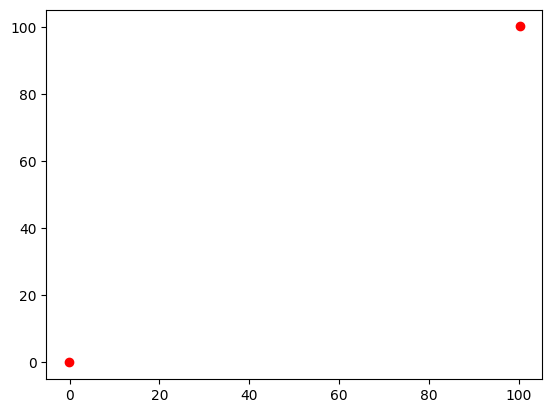

In [ ]:
root = np.array([g1_a[-1], g2_a[-1], g3_a[-1]])
np.testing.assert_array_almost_equal(root, [np.nan, 0.618034, 1.375268])
plt.plot(f.roots(), f.roots(), 'ro')
plt.plot(f.roots(), [0.0]*5, 'ro')
plt.axhline(y=0, color='k')
for y in f.roots():
    plt.axvline(x=y, color='k')

xs = np.linspace(-2.5, 1.5, 100)
plt.plot(xs, xs, label='y=x', color = 'g')
plt.plot(xs, f(xs), label='f(x)', color='b')
plt.plot(xs, g1(xs), label='g1(x)', color='c')
plt.plot(xs, g2(xs), label='g2(x)', color ='m')
plt.plot(xs, g3(xs), label='g3(x)', color = 'y' )
plt.legend()